In [66]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, pickle
from time import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

In [67]:
LARGE_FONT= ("Verdana", 12)

plt.style.use('bmh')
pd.options.display.float_format = '{:.5}'.format
pd.set_option('display.max_columns', 12)

In [68]:
df = pd.read_csv('qq5Data-master\\qq5p4data\\AGG.csv')
print(df.shape)
# print(df.head())
# districts_nums = [len(c[1]) for c in list(state_map.values())]
# print(districts_nums)

# districts_done = 0
# for j in range(len(state_list)):
#     f_name = "WPS/" + str(state_list[j]) + ".csv"
#     reqd_cols = ["state", "district", "rural", "age", "no_of_anc", "year_of_intr", "month_of_intr", "no_of_tt_injections",
#                  "where_del_took_place", "who_conducted_del_at_home", "maternity_financial_asistance", "place_of_pnc", "sex",
#                  "highest_qualification", "currently_widow", "religion", "social_group_code", "mother_age_when_baby_was_born",
#                  "is_condom", "iscoveredbyhealthscheme", "is_pills_daily", "is_tubectomy", "is_copper_t",
#                  "aware_abt_haf", "aware_abt_ort_ors", "aware_abt_ort_ors_zinc", "during_pregnancyx", "during_lactationx",
#                  "regular_treatment", "regular_treatment_source", "consumption_of_ifa_syrup", "consumption_of_ifa"]

#     with open(f_name) as fopen:
#         headline = fopen.readline().split(',')

#     useful_cols = [i for i in range(len(headline)) if headline[i] in reqd_cols]

#     df = pd.read_csv(f_name, ',', header=0, usecols=useful_cols)
#     # my_read_csv = partial(pd.read_csv, header=0, usecols=useful_cols)
#     # df = pd.concat(map(my_read_csv, glob.glob(os.path.join('WPS', "*.csv"))))
#     print(df.shape)
#     df['district'] = df['district'] + districts_done
#     print(districts_done)
#     districts_done += districts_nums[j]
#     df.to_pickle('_MTP/maternity_health/wps_' + str(state_list[j]) + '.pkl')

(8427, 73)


Idea: Use timestamps without dates.

In [69]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train, test = df[df['is_train']==True], df[df['is_train']==False]

print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

features = df.columns[1:72]
print(features)

y = train.Y

# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)

Number of observations in the training data: 6321
Number of observations in the test data: 2106
Index(['F0', 'F1', 'F2', 'F3', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21',
       'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31',
       'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41',
       'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51',
       'F52', 'F53', 'F54', 'F55', 'F56', 'F57', 'F58', 'F59', 'F60', 'F61',
       'F62', 'F63', 'F64', 'F65', 'F66', 'F67', 'F68', 'F69', 'F70', 'F71'],
      dtype='object')


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [70]:
preds = clf.predict(test[features])

preds[:5]

test['Y'].head()

1     0
6     0
7     0
9     0
11    1
Name: Y, dtype: int64

In [71]:
pd.crosstab(test['Y'], preds, rownames=['Actual'], colnames=['Predicted'])

Predicted    0    1
Actual             
0          928  168
1          305  705

In [72]:
from sklearn.metrics import accuracy_score  
accuracy = accuracy_score(test['Y'], preds)
print("###########################")
print(f'Mean accuracy score: {accuracy:.3}')

###########################
Mean accuracy score: 0.775


In [53]:
# list(zip(train[features], clf.feature_importances_))

[56.4  89.33 94.65 96.88 98.04 98.96 99.38 99.56]


No handles with labels found to put in legend.


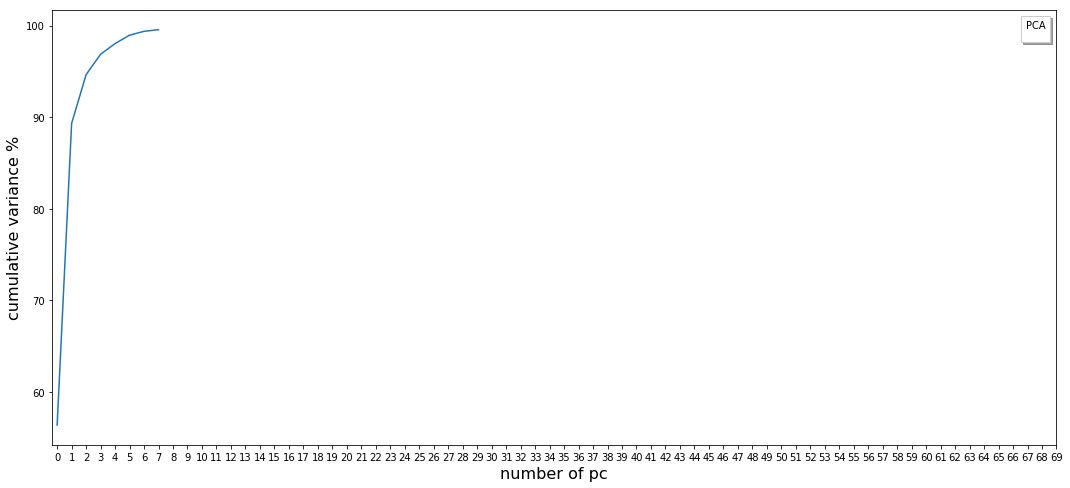

In [43]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(df[features])
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
fig = plt.figure(figsize = (18,8))
plt.plot(var1)
plt.xticks([i for i in range(70)])
plt.xlabel('number of pc', fontsize=16)
plt.ylabel('cumulative variance %', fontsize=16)
plt.legend(loc='best', fontsize = 12, shadow = True, fancybox = False, title = 'PCA', ncol = 1)
plt.show()

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
X = pd.read_csv('qq5Data-master\\qq5p4data\\AGG.csv', index_col=0, parse_dates=['datetime'])
y = X.pop('Y')
X.head()

F0     F1   F2     F3      F5     F6    F7     F8  \
datetime                                                                      
2010-06-02 09:30:00  109.465  0.455  0.1   52.6  76.495   52.6 -2.23  14.46   
2010-06-02 10:00:00  110.377  0.459  0.2  107.8  77.136  107.8 -3.20  17.63   
2010-06-02 10:30:00  110.202  0.458 -0.1  170.4  77.017  170.4 -3.46  16.67   
2010-06-02 11:00:00  110.307  0.459  0.0  189.0  77.092  189.0 -3.64  16.54   
2010-06-02 11:30:00  110.061  0.458 -0.1  201.6  76.922  201.6 -3.23  12.60   

                        F9    F10  ...      F62    F63    F64    F65    F66  \
datetime                           ...                                        
2010-06-02 09:30:00  10.49  15.52  ...   -1.403  0.913 -0.396  0.565  1.931   
2010-06-02 10:00:00  13.72  15.63  ...    1.639  1.100 -0.267  0.486  2.407   
2010-06-02 10:30:00  13.13  15.46  ...    1.385  1.058 -0.246  0.684  2.502   
2010-06-02 11:00:00  12.38  17.29  ...    0.273  0.961 -0.286  0.612  2.444   
2010-06-02 11:30:00  14.79  17.74  ...    0.230  0.549 -0.186  0.579  2.464   

                       F67    F68    F69    F70    F71  
datetime                                                
2010-06-02 09:30:00  2.139  1.926  0.620  0.424  0.415  
2010-06-02 10:00:00  2.717  2.298  0.365  0.221  0.224  
2010-06-02 10:30:00  2.499  2.104  0.146  0.118  0.186  
2010-06-02 11:00:00  2.453  2.061  0.181  0.145  0.196  
2010-06-02 11:30:00  2.227  2.077  0.239  0.292  0.255  

[5 rows x 71 columns]

In [46]:
class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [49]:
print(X.columns[-10:])
features = X.columns[:72]
print(features)

Index(['F62', 'F63', 'F64', 'F65', 'F66', 'F67', 'F68', 'F69', 'F70', 'F71'], dtype='object')
Index(['F0', 'F1', 'F2', 'F3', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21',
       'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31',
       'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41',
       'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51',
       'F52', 'F53', 'F54', 'F55', 'F56', 'F57', 'F58', 'F59', 'F60', 'F61',
       'F62', 'F63', 'F64', 'F65', 'F66', 'F67', 'F68', 'F69', 'F70', 'F71'],
      dtype='object')


In [50]:
transformer = ReduceVIF()

# Only use 10 columns for speed in this example
X = transformer.fit_transform(X[X.columns[:72]], y)

X.head()

ReduceVIF fit
ReduceVIF transform


c:\python36\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping F3 with vif=inf
Dropping F34 with vif=inf
Dropping F38 with vif=546070.1400744893
Dropping F5 with vif=249070.5112806004
Dropping F56 with vif=125259.16649103421
Dropping F37 with vif=110533.58717415524
Dropping F60 with vif=105793.62021061119
Dropping F55 with vif=65001.907843470355
Dropping F59 with vif=54267.92034764499
Dropping F54 with vif=25981.31809939436
Dropping F58 with vif=23152.89685507981
Dropping F39 with vif=9674.031779157905
Dropping F0 with vif=5889.415578936068
Dropping F53 with vif=5650.521403784912
Dropping F40 with vif=5521.002395577214
Dropping F33 with vif=1113.0051460799755
Dropping F41 with vif=551.5377702398822
Dropping F57 with vif=293.2272809015568
Dropping F25 with vif=190.51659951201637
Dropping F1 with vif=95.93123110636841
Dropping F24 with vif=93.75617896919603
Dropping F20 with vif=60.80240985074841
Dropping F32 with vif=58.5979297532095
Dropping F27 with vif=55.861087255980564
Dropping F22 with vif=54.73186922156221
Dropping F36 with vif=49.2

F2     F6    F7    F14    F29    F45    F46    F47    F61    F62    F63  \
0  0.1   52.6 -2.23 -1.215  0.578  0.374  0.980  0.276 -0.290 -1.403  0.913   
1  0.2  107.8 -3.20 -1.044  0.570  0.372  0.976  0.279 -0.099  1.639  1.100   
2 -0.1  170.4 -3.46 -0.485  0.551  0.369  0.973  0.308 -0.753  1.385  1.058   
3  0.0  189.0 -3.64 -0.123  0.529  0.364  0.969  0.217 -0.717  0.273  0.961   
4 -0.1  201.6 -3.23 -0.177  0.505  0.360  0.966  0.086 -0.923  0.230  0.549   

     F64    F66    F69    F71  
0 -0.396  1.931  0.620  0.415  
1 -0.267  2.407  0.365  0.224  
2 -0.246  2.502  0.146  0.186  
3 -0.286  2.444  0.181  0.196  
4 -0.186  2.464  0.239  0.255

In [52]:
true_features = X.columns
print(true_features)

Index(['F2', 'F6', 'F7', 'F14', 'F29', 'F45', 'F46', 'F47', 'F61', 'F62',
       'F63', 'F64', 'F66', 'F69', 'F71'],
      dtype='object')


In [58]:
# X.info()
df = pd.read_csv('qq5Data-master\\qq5p4data\\AGG.csv', index_col=0, parse_dates=['datetime'])
y = df.Y
print(y)

datetime
2010-06-02 09:30:00    0
2010-06-02 10:00:00    0
2010-06-02 10:30:00    0
2010-06-02 11:00:00    0
2010-06-02 11:30:00    0
2010-06-02 12:00:00    0
2010-06-02 12:30:00    0
2010-06-02 13:00:00    0
2010-06-02 13:30:00    0
2010-06-02 14:00:00    0
2010-06-02 14:30:00    1
2010-06-02 15:00:00    1
2010-06-02 15:30:00    0
2010-06-03 09:30:00    0
2010-06-03 10:00:00    0
2010-06-03 10:30:00    0
2010-06-03 11:00:00    0
2010-06-03 11:30:00    0
2010-06-03 12:00:00    0
2010-06-03 12:30:00    0
2010-06-03 13:00:00    0
2010-06-03 13:30:00    0
2010-06-03 14:00:00    0
2010-06-03 14:30:00    0
2010-06-03 15:00:00    0
2010-06-03 15:30:00    0
2010-06-04 09:30:00    0
2010-06-04 10:00:00    0
2010-06-04 10:30:00    0
2010-06-04 11:00:00    0
                      ..
2013-02-05 14:00:00    0
2013-02-05 14:30:00    0
2013-02-05 15:00:00    1
2013-02-05 15:30:00    0
2013-02-06 09:30:00    0
2013-02-06 10:00:00    0
2013-02-06 10:30:00    1
2013-02-06 11:00:00    1
2013-02-06 11:30

In [60]:
X['Y'] = y
df = X.copy()
print(df.head(), y)

    F2     F6    F7    F14    F29    F45    F46    F47    F61    F62    F63  \
0  0.1   52.6 -2.23 -1.215  0.578  0.374  0.980  0.276 -0.290 -1.403  0.913   
1  0.2  107.8 -3.20 -1.044  0.570  0.372  0.976  0.279 -0.099  1.639  1.100   
2 -0.1  170.4 -3.46 -0.485  0.551  0.369  0.973  0.308 -0.753  1.385  1.058   
3  0.0  189.0 -3.64 -0.123  0.529  0.364  0.969  0.217 -0.717  0.273  0.961   
4 -0.1  201.6 -3.23 -0.177  0.505  0.360  0.966  0.086 -0.923  0.230  0.549   

     F64    F66    F69    F71   Y  
0 -0.396  1.931  0.620  0.415 NaN  
1 -0.267  2.407  0.365  0.224 NaN  
2 -0.246  2.502  0.146  0.186 NaN  
3 -0.286  2.444  0.181  0.196 NaN  
4 -0.186  2.464  0.239  0.255 NaN   datetime
2010-06-02 09:30:00    0
2010-06-02 10:00:00    0
2010-06-02 10:30:00    0
2010-06-02 11:00:00    0
2010-06-02 11:30:00    0
2010-06-02 12:00:00    0
2010-06-02 12:30:00    0
2010-06-02 13:00:00    0
2010-06-02 13:30:00    0
2010-06-02 14:00:00    0
2010-06-02 14:30:00    1
2010-06-02 15:00:00    1


In [65]:
y.columns = ['datetime', 'Y']
print(y)

datetime
2010-06-02 09:30:00    0
2010-06-02 10:00:00    0
2010-06-02 10:30:00    0
2010-06-02 11:00:00    0
2010-06-02 11:30:00    0
2010-06-02 12:00:00    0
2010-06-02 12:30:00    0
2010-06-02 13:00:00    0
2010-06-02 13:30:00    0
2010-06-02 14:00:00    0
2010-06-02 14:30:00    1
2010-06-02 15:00:00    1
2010-06-02 15:30:00    0
2010-06-03 09:30:00    0
2010-06-03 10:00:00    0
2010-06-03 10:30:00    0
2010-06-03 11:00:00    0
2010-06-03 11:30:00    0
2010-06-03 12:00:00    0
2010-06-03 12:30:00    0
2010-06-03 13:00:00    0
2010-06-03 13:30:00    0
2010-06-03 14:00:00    0
2010-06-03 14:30:00    0
2010-06-03 15:00:00    0
2010-06-03 15:30:00    0
2010-06-04 09:30:00    0
2010-06-04 10:00:00    0
2010-06-04 10:30:00    0
2010-06-04 11:00:00    0
                      ..
2013-02-05 14:00:00    0
2013-02-05 14:30:00    0
2013-02-05 15:00:00    1
2013-02-05 15:30:00    0
2013-02-06 09:30:00    0
2013-02-06 10:00:00    0
2013-02-06 10:30:00    1
2013-02-06 11:00:00    1
2013-02-06 11:30

In [55]:
X['Y'] = y
df = X.copy()

df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train, test = df[df['is_train']==True], df[df['is_train']==False]

print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

y = train.Y

clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[true_features], y)

preds = clf.predict(test[true_features])

print(preds[:5])

print(test['Y'].head())

Number of observations in the training data: 6358
Number of observations in the test data: 2069


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
pd.crosstab(test['Y'], preds, rownames=['Actual'], colnames=['Predicted'])